<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 2

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Volumes in Many Dimensions

### Problem 1.1 (Exam Style)

The volume of a compact set can be expressed as $\int_{A} 1 \,dA$.

Thus, $c(d,a)$ of $C(d,a)$ can be written as $a^d$ when integrating over $d$ dimensions. Therefore, $c(d,1)$ is $1^d$ which is $1$ for all possible values of $d$. 

### Problem 1.2 (Exam Style)

The volume $e(d,\epsilon)$ of $E(d,\epsilon)$ can be written as $c(d,1) - c(d,1-\epsilon)$, which is $1-(1-\epsilon)^d$.

### Problem 1.3 (Exam Style)

$e(d,\epsilon) = 1 - (1-\epsilon)^d$

$e(d,\epsilon) = 1 - (1+(\text{-}\epsilon))^d$

$e(d,\epsilon) = 1 - ({d \choose 0}\epsilon^0 + {d \choose 1}(\text{-}\epsilon)^1)$ by binomial expansion

$e(d,\epsilon) = 1 - (1 - d\epsilon)$

$e(d,\epsilon) = d*\epsilon$

Given the expression in problem 1.2 was defined using the unit cube, we may say that $d = 1/\epsilon$ when the $\epsilon$-skin takes up all of the cube's volume. 

### Problem 1.4 (Exam Style)

Text(0, 0.5, 'E-Skin Volume')

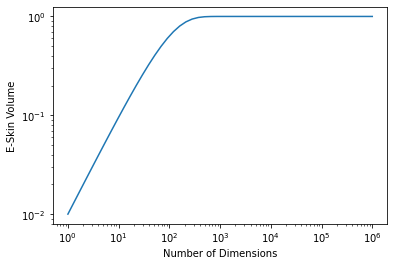

In [3]:
from matplotlib import pyplot as plt
import numpy as np

volume = []

def edge_volume(dimension, epsilon):
    return 1 - np.power(1-epsilon, dimension)

logspace = np.logspace(0,6)
for element in logspace:
    volume.append(edge_volume(element, 10E-3))

plt.loglog(logspace, np.array(volume))
plt.xlabel('Number of Dimensions')
plt.ylabel('E-Skin Volume')

Given the previously derived expression, the number of dimensions required for the $\epsilon$-skin to take up all of the cube's volume would be $10^{3}$, such that $\epsilon * d$ equals 1. Our approximation is close to the desired $d$ value, given the above curve reaches 1 between $10^{2}$ and $10^{3}$ dimensions. 

## Part 2: Voronoi Geometry 

### Problem 2.1 (Exam Style)

### Problem 2.2

In [5]:
import numpy as np

test_points = np.array(
    [
        [[2., 0.], [0., 3.], [-4., -1.]],
        [[0., 0.], [0., 2.], [3., 0.]],
        [[-4., -1.], [3., 3.], [0. ,0.]]
    ]
)

## Part 3: Nearest Neighbor Regression 

In [26]:
from urllib.request import urlretrieve
from os import path as osp
import pickle


def retrieve(file_name, semester='fall22', course='371', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [27]:
file_name = 'ames.pickle'
retrieve(file_name)
with open(file_name, 'rb') as file:
    ames = pickle.load(file)

Using previously downloaded file ames.pickle


### Problem 3.1

### Problem 3.2

### Problem 3.3 (Exam Style)

## Part 4: Nearest-Neighbor Density Estimation 

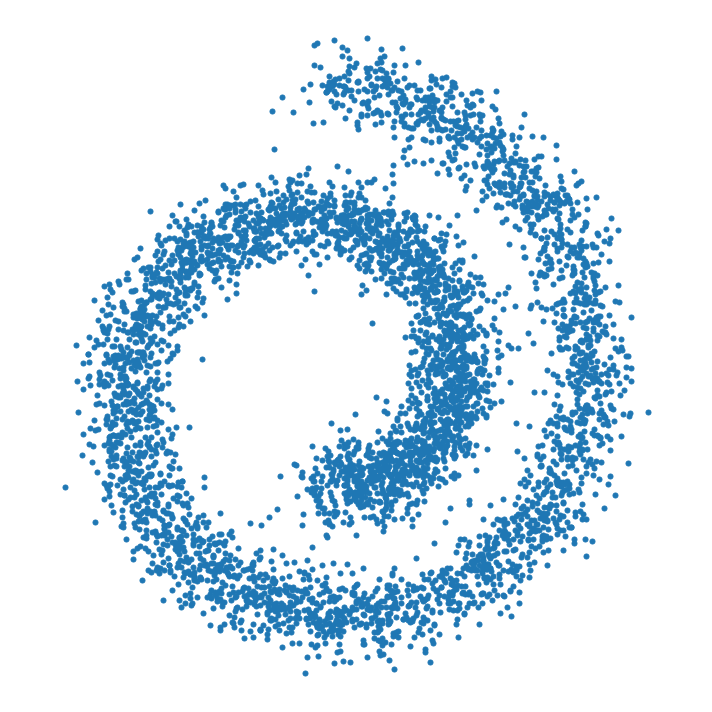

In [33]:
from sklearn.datasets import make_swiss_roll

%matplotlib inline
import matplotlib.pyplot as plt

n_training_samples, noise = 5000, 1.
roll = make_swiss_roll(n_training_samples, noise=noise)[0][:, (0, 2)]
x_roll, y_roll = roll[:, 0], roll[:, 1]

plt.figure(figsize=(10, 10), tight_layout=True)
plt.plot(x_roll, y_roll, '.', ms=10)
plt.axis('equal')
plt.axis('off')
plt.show()

### Problem 4.1

In [34]:
n_plot_samples = 200
margin = 0.01
x_bounds = (1 + margin) * np.array([x_roll.min(), x_roll.max()])
y_bounds = (1 + margin) * np.array([y_roll.min(), y_roll.max()])
x_grid = np.linspace(x_bounds[0], x_bounds[1], n_plot_samples)
y_grid = np.linspace(y_bounds[0], y_bounds[1], n_plot_samples)
xx_grid, yy_grid = np.meshgrid(x_grid, y_grid)
queries = np.stack((xx_grid.ravel(), yy_grid.ravel()), axis=1)

In [36]:
def show_density(den):
    den = np.reshape(den, (n_plot_samples, n_plot_samples))
    n_levels = 20
    levels = np.linspace(0, den.max(), n_levels)
    plt.figure(figsize=(10, 10), tight_layout=True)
    plt.contourf(x_grid, y_grid, den, levels=levels, cmap=plt.cm.Reds)
    plt.axis('equal')
    plt.axis('off')
    plt.show()